In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.signal as signal


In [8]:
def plot_psd(directory: str, classification: str, ratio: float = 5):
    center_freq = 2.437e9  # 2.437 GHz in Hz
    bandwidth = 30e6      # 30 MHz in Hz
    plt.figure(figsize=(40, 20))
    file_counter = 0
    # Get list of matching files
    files = [f for f in os.listdir(directory) if f.endswith('.npy') and classification in f.lower()]
    # Shuffle the files
    np.random.shuffle(files)
    
    for filename in files:
        data = np.load(os.path.join(directory, filename))
        # Peak detection based on ratio
        mean_val = np.mean(data)
        threshold = mean_val * ratio**-1
        peaks, properties = signal.find_peaks(data, height=threshold)
        if len(peaks) == 0:
            continue  # Skip plots that do not pass the threshold
        
        if file_counter >= 10:
            break
        # Generate frequency axis
        frequencies = np.linspace(center_freq - bandwidth/2, center_freq + bandwidth/2, len(data)) / 1e6  # Convert to MHz
        plt.subplot(5, 2, file_counter + 1)
        plt.plot(frequencies, data, label=filename)
        plt.plot(frequencies[peaks], data[peaks], "x")
        plt.axhline(y=mean_val, color='r', linestyle='--', label='Mean Value')
        plt.axhline(y=threshold, color='g', linestyle='--', label='Threshold')
        plt.legend()
        plt.title(f'Plot of {filename}')
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('dBm')
        plt.grid(True)
        plt.xticks(np.arange(frequencies[0], frequencies[-1], 1))  # 1 MHz ticks
        plt.yticks(np.linspace(min(data), max(data), 10))
        file_counter += 1
    plt.tight_layout()
    plt.show()

def plot_psd_slices(directory: str, classification: str):
    center_freq = 2.437e9  # 2.437 GHz in Hz
    bandwidth = 100e6      # 100 MHz in Hz
    plt.figure(figsize=(40, 20))
    file_counter = 0
    # Get list of matching files
    files = [f for f in os.listdir(directory) if f.endswith('.npy') and classification in f.lower()]
    # Shuffle the files
    np.random.shuffle(files)
    
    for filename in files:
        data = np.load(os.path.join(directory, filename))
        # Peak detection based on ratio
        
        if file_counter >= 10:
            break
        # Generate frequency axis
        frequencies = np.linspace(center_freq - bandwidth/2, center_freq + bandwidth/2, len(data)) / 1e6  # Convert to MHz
        plt.subplot(5, 2, file_counter + 1)
        plt.plot(frequencies, data, label=filename)
        plt.legend()
        plt.title(f'Plot of {filename}')
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('dBm')
        plt.grid(True)
        plt.xticks(np.arange(frequencies[0], frequencies[-1], 10))  # 1 MHz ticks
        plt.yticks(np.linspace(min(data), max(data), 10))
        file_counter += 1
    plt.tight_layout()
    plt.show()

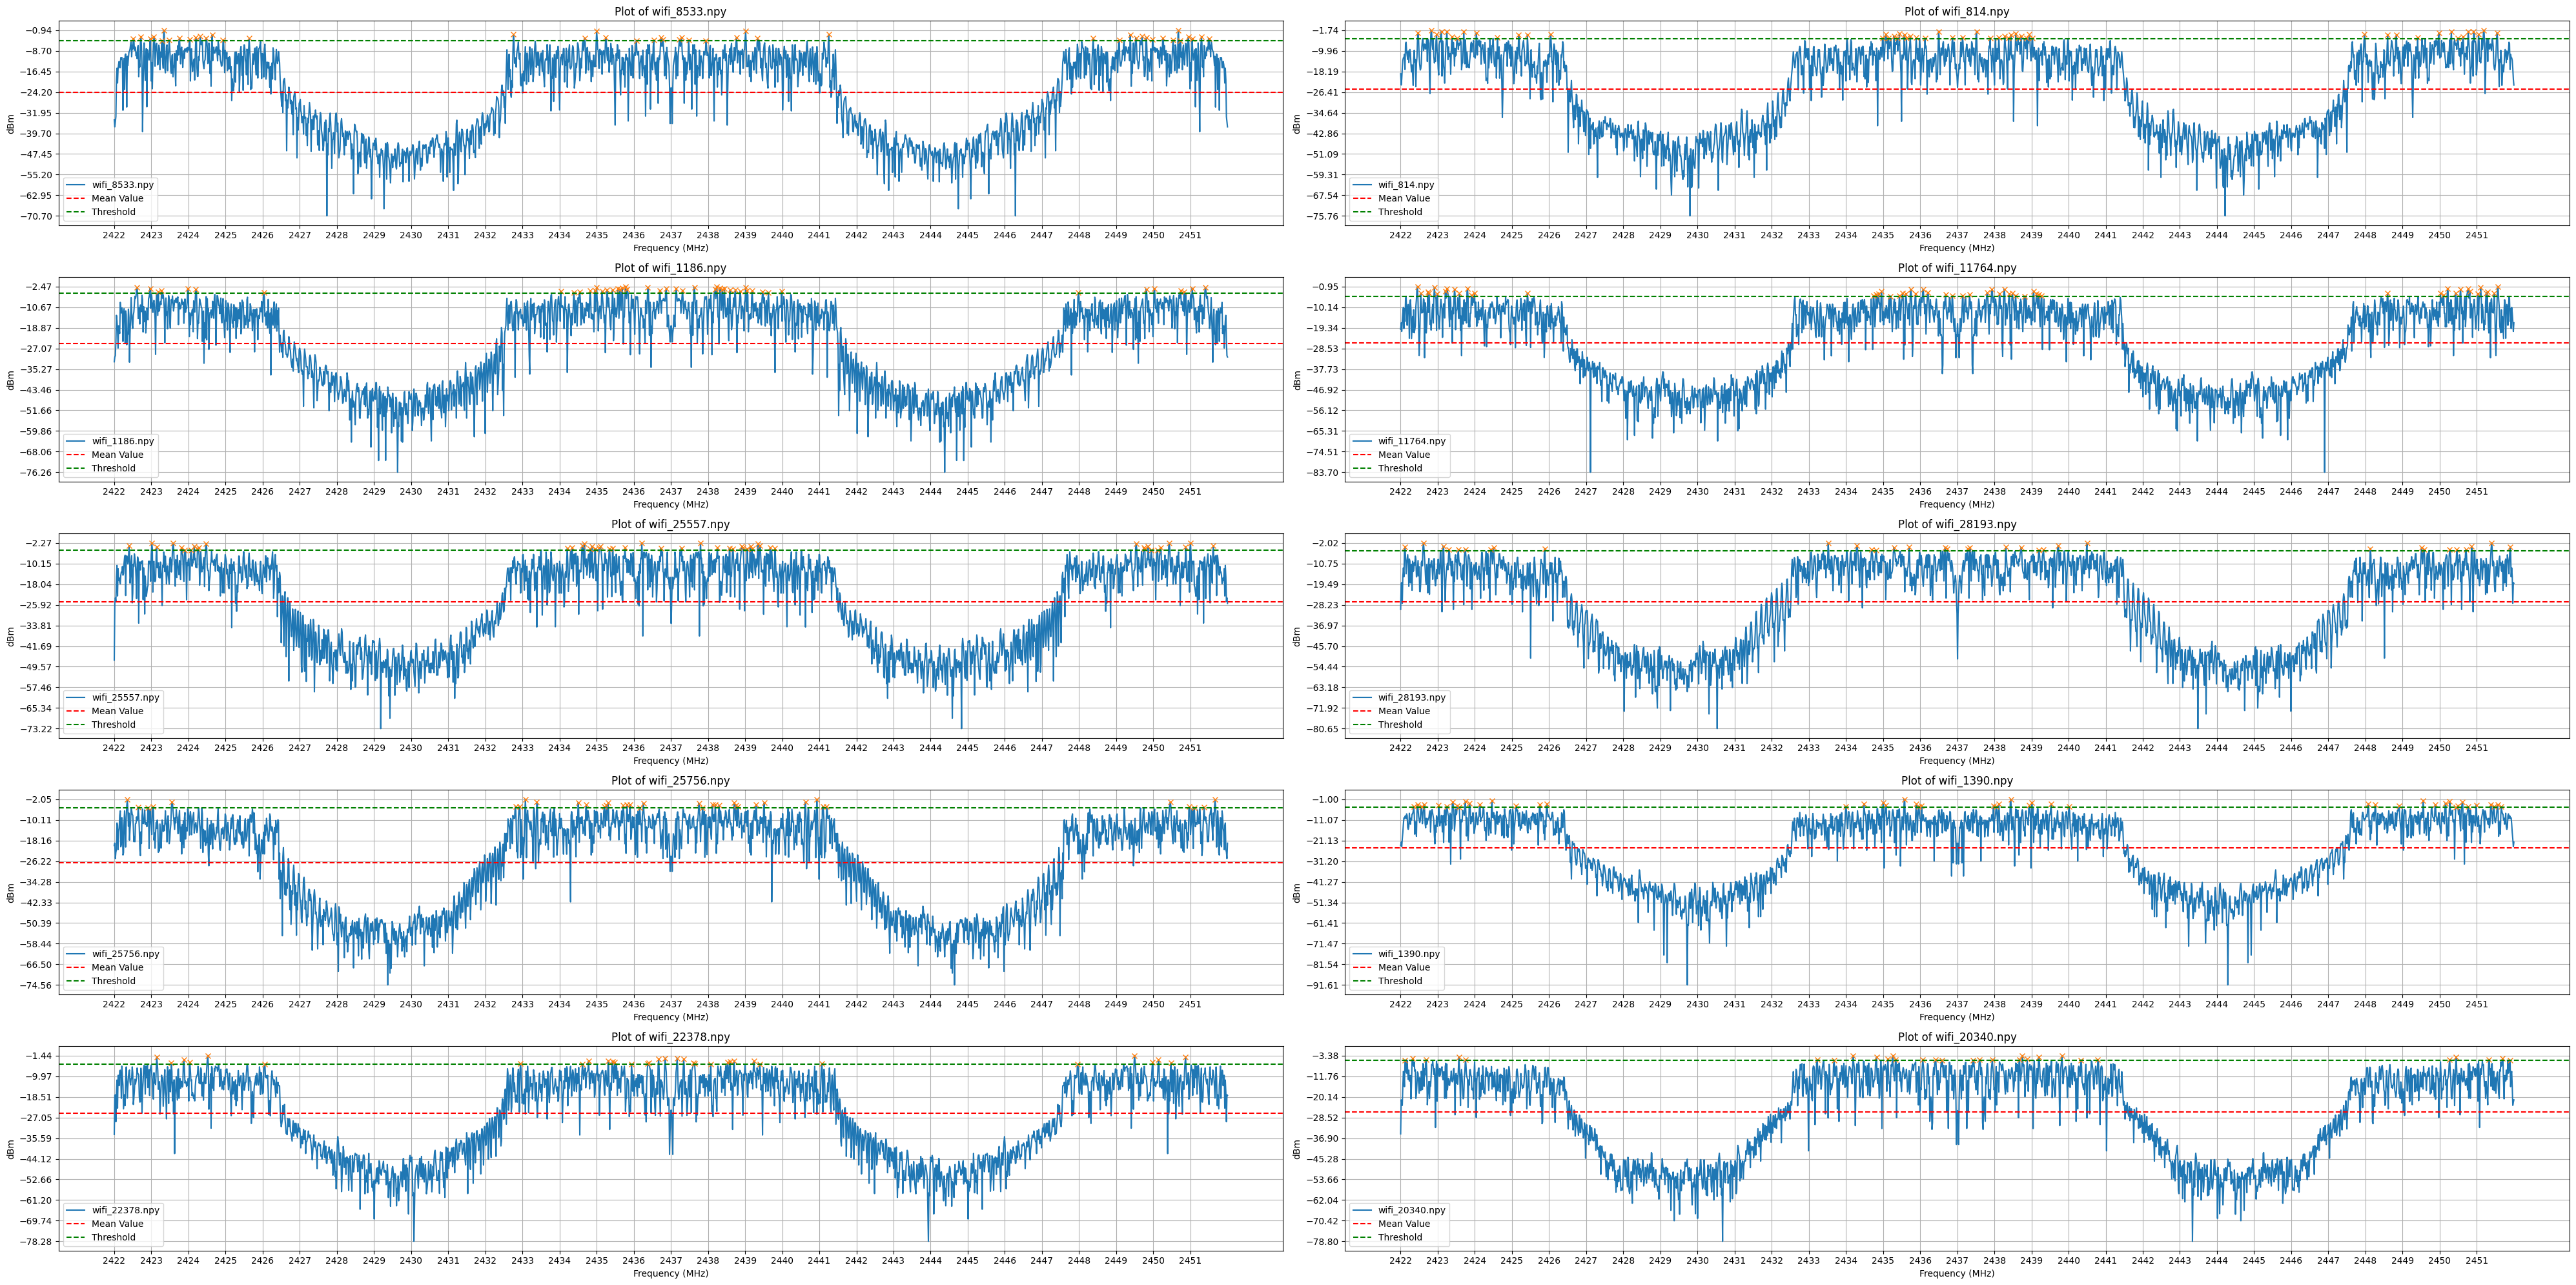

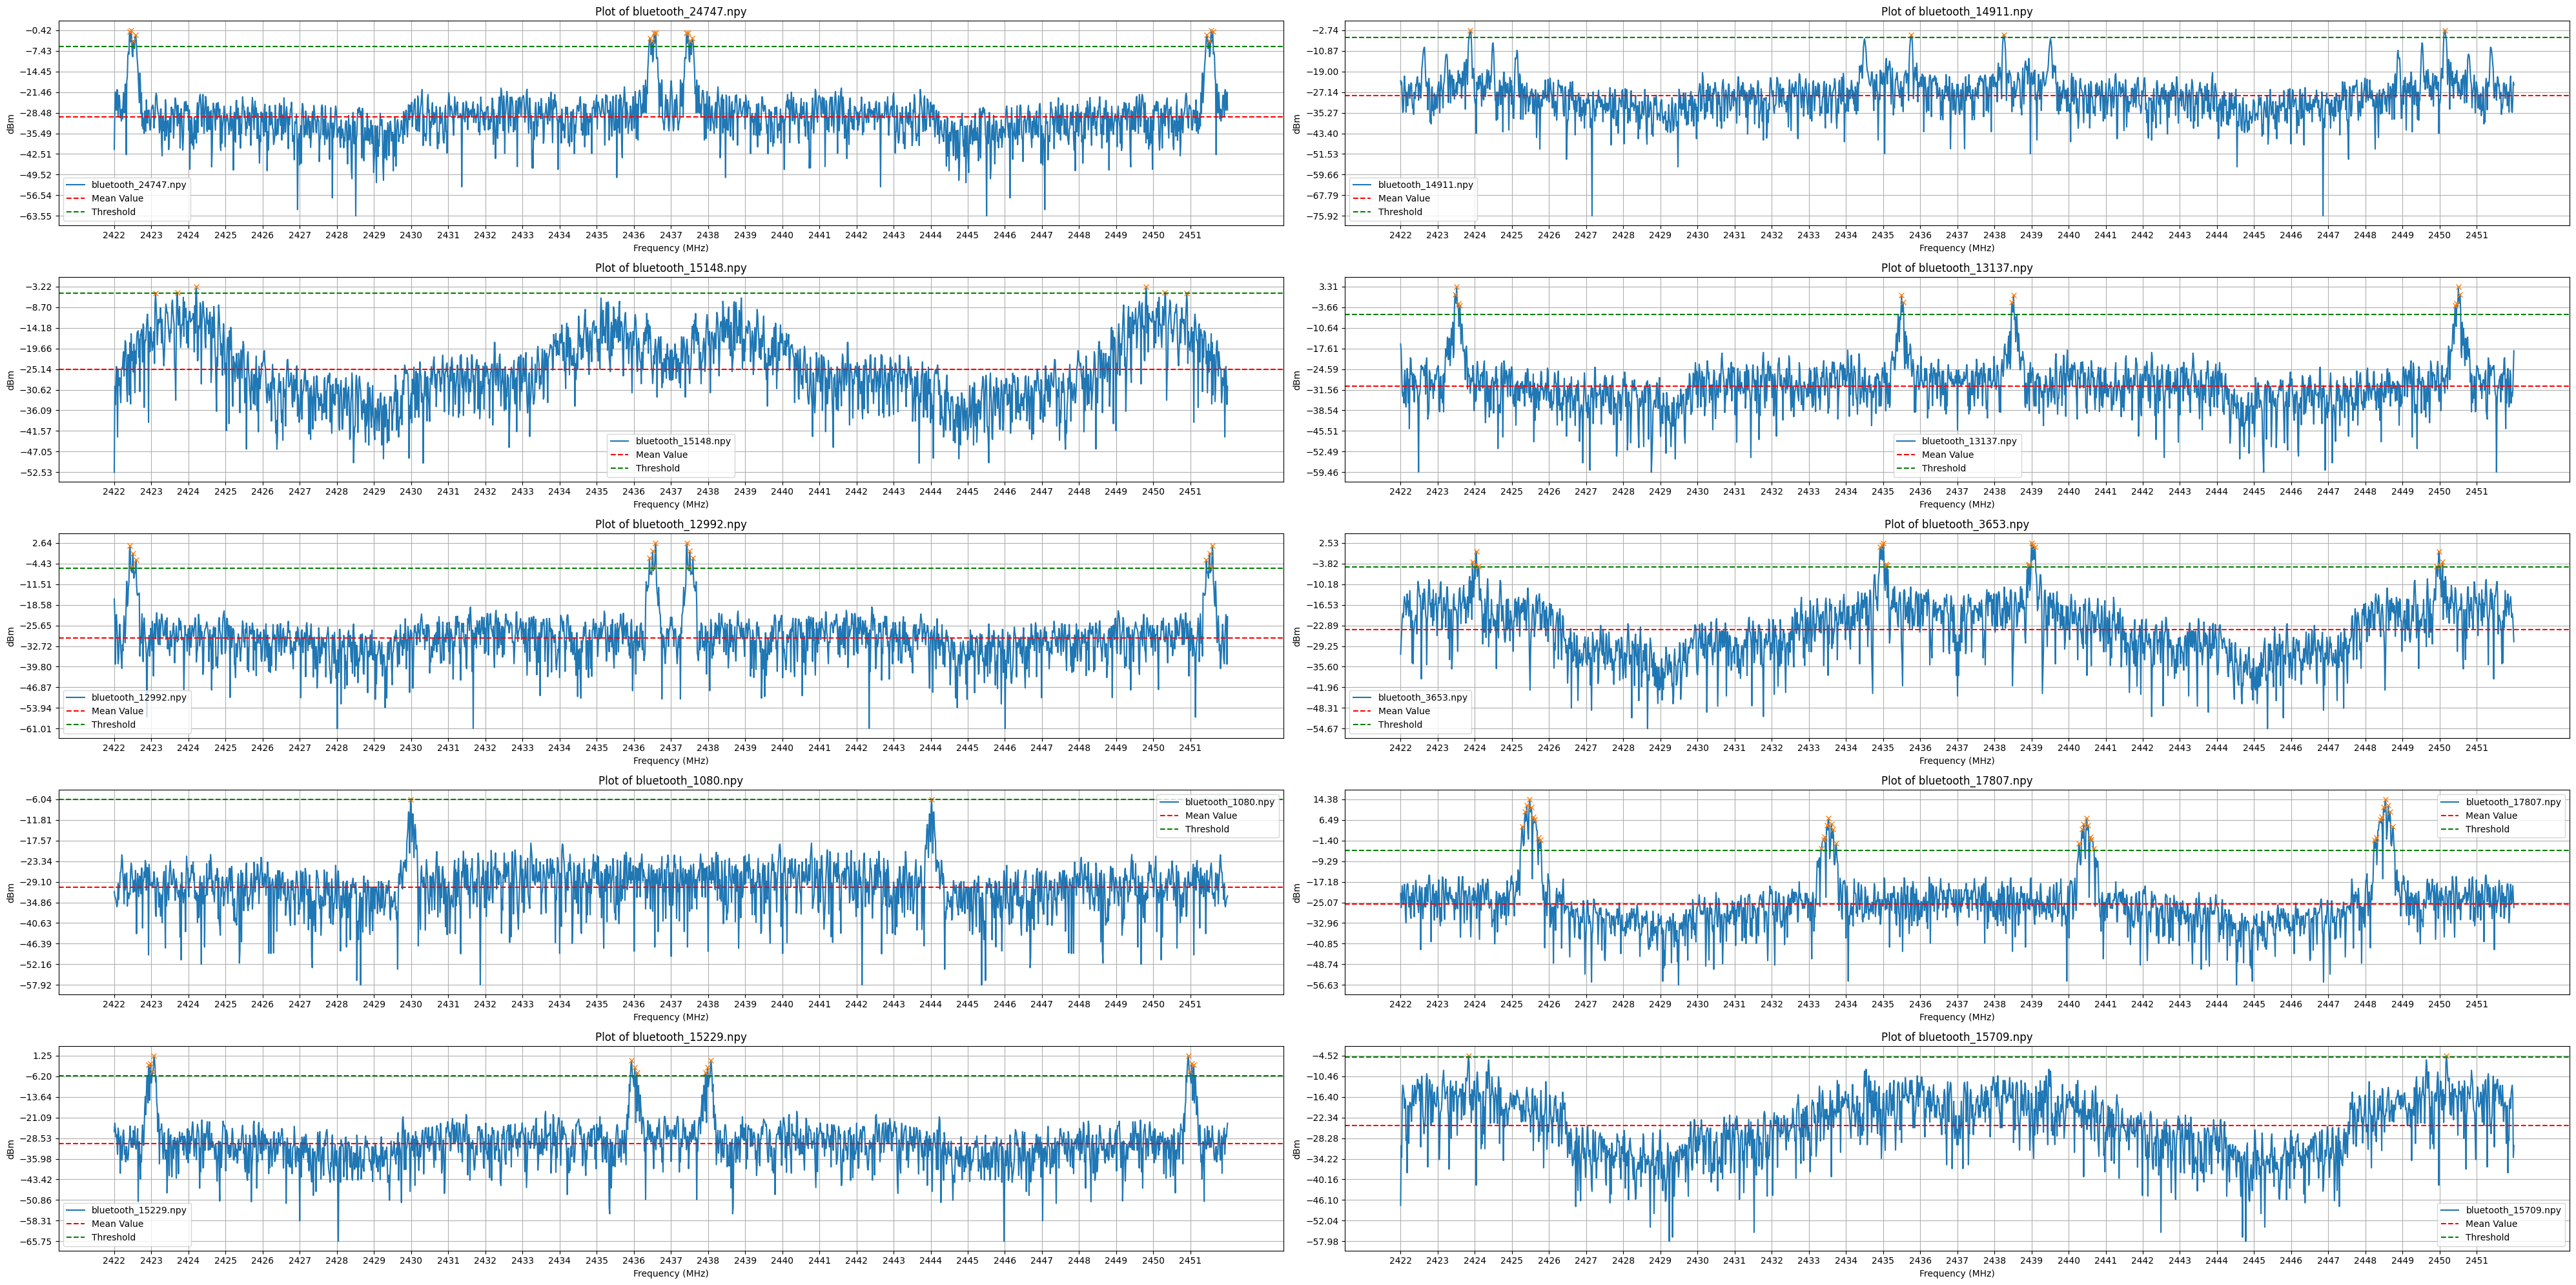

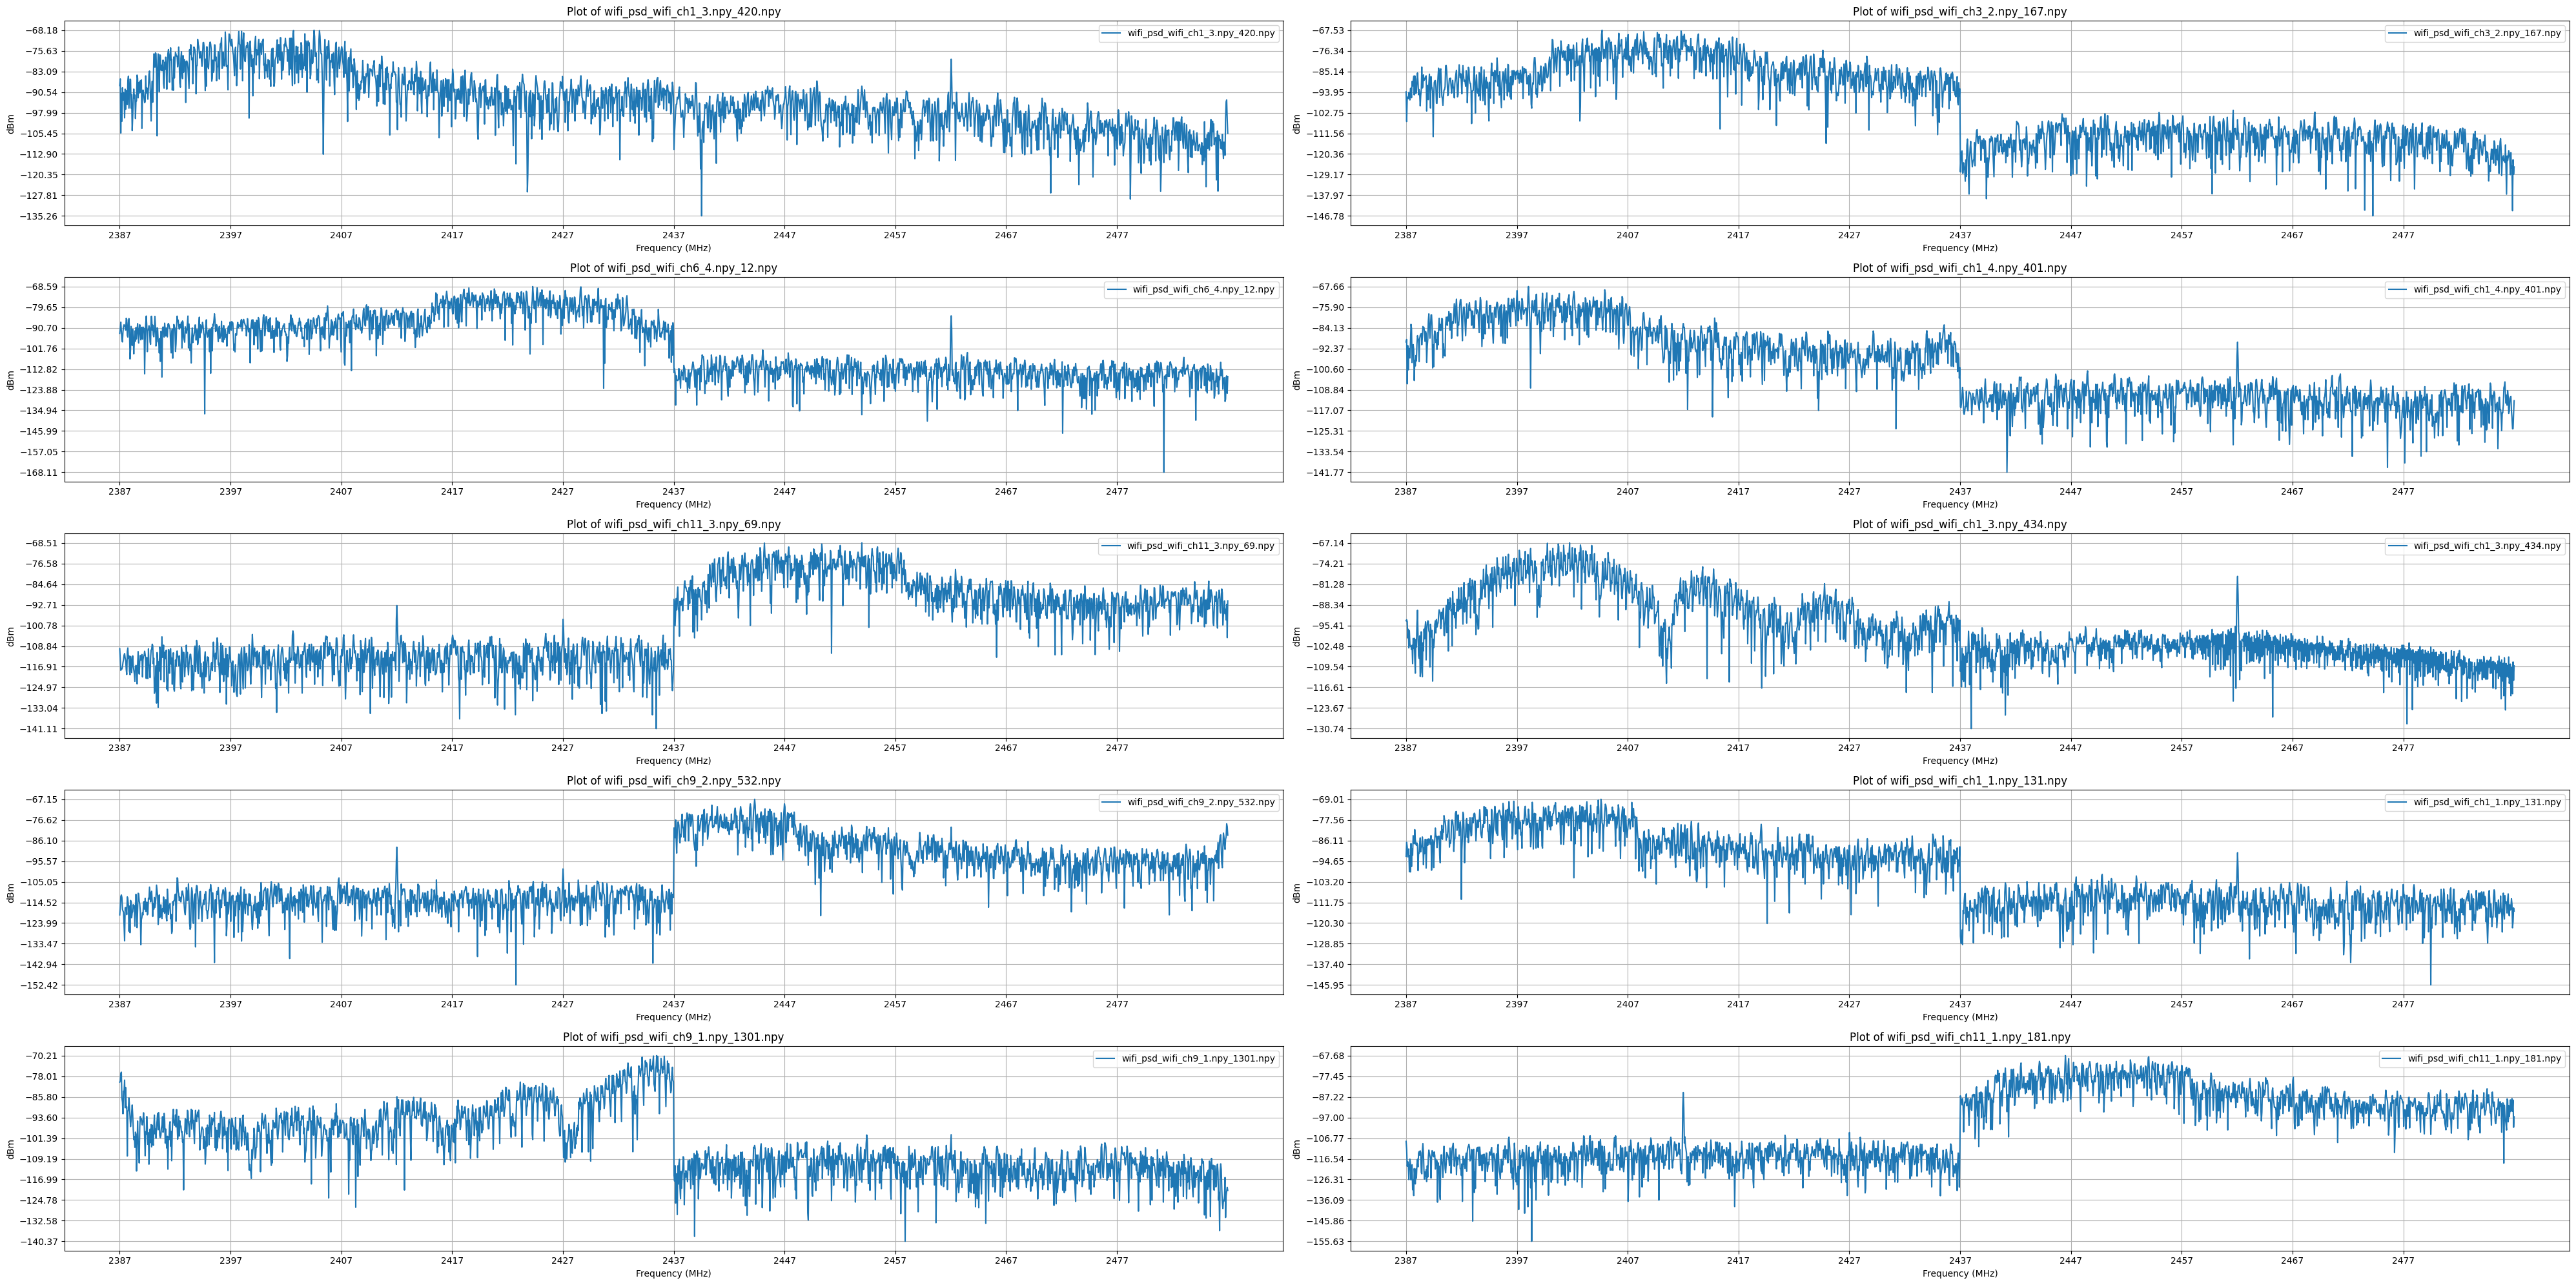

In [9]:
plot_psd('../data/open_data/training_psd/', 'wifi')
plot_psd('../data/open_data/training_psd/', 'bluetooth')
plot_psd_slices('../data/recorded_data/training_psd/', 'wifi')
